<a href="https://colab.research.google.com/github/hasnain112e/Titanic-Survival-Prediction-Logistic-Regression/blob/main/Titanic_Survival_Prediction_Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Build a Logistic Regression model in Python to predict passenger survival using the Titanic dataset from Seaborn. The model should be trained on 80% of the data and tested on 20%. The final output should include the model's coefficients and intercept, accuracy score, classification report, and a confusion matrix visualization. The following columns should be dropped: deck, embark_town, alive, class, who, adult_male. Rows with missing values should be removed. The 'sex' column should be encoded as male=0, female=1, and the 'embarked' column as S=0, C=1, Q=2. The features to be used are: pclass, sex, age, sibsp, parch, fare, embarked, and the target is 'survived'.

## Setup

### Subtask:
Install and import the necessary libraries.


**Reasoning**:
Install necessary libraries for data manipulation, analysis, and model building.



In [1]:
%pip install seaborn pandas numpy scikit-learn matplotlib

**Reasoning**:
Import the necessary libraries and modules for data manipulation, visualization, and machine learning model building.



In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt

## Data loading and initial inspection

### Subtask:
Load the Titanic dataset from Seaborn and display its first few rows and information to understand the data structure.


**Reasoning**:
Load the Titanic dataset, display the first few rows, and print the DataFrame's information to understand its structure.



In [3]:
df = sns.load_dataset('titanic')
display(df.head())
df.info()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


## Data cleaning

### Subtask:
Drop irrelevant columns and remove rows with missing values as specified.


**Reasoning**:
Drop the specified columns and remove rows with missing values, then display the DataFrame's information to verify.



In [4]:
columns_to_drop = ['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male']
df = df.drop(columns=columns_to_drop)
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  712 non-null    int64  
 1   pclass    712 non-null    int64  
 2   sex       712 non-null    object 
 3   age       712 non-null    float64
 4   sibsp     712 non-null    int64  
 5   parch     712 non-null    int64  
 6   fare      712 non-null    float64
 7   embarked  712 non-null    object 
 8   alone     712 non-null    bool   
dtypes: bool(1), float64(2), int64(4), object(2)
memory usage: 50.8+ KB


## Feature engineering

### Subtask:
Encode categorical variables into numerical representations suitable for the model.


**Reasoning**:
Encode the 'sex' and 'embarked' columns using the specified mappings.



In [5]:
df['sex'] = df['sex'].map({'male': 0, 'female': 1})
df['embarked'] = df['embarked'].map({'S': 0, 'C': 1, 'Q': 2})
display(df.head())

,survived,pclass,sex,age,sibsp,parch,fare,embarked,alone
0,0,3,0,22.0,1,0,7.2500,0,False
1,1,1,1,38.0,1,0,71.2833,1,False
2,1,3,1,26.0,0,0,7.9250,0,True
3,1,1,1,35.0,1,0,53.1000,0,False
4,0,3,0,35.0,0,0,8.0500,0,True


## Data preparation

### Subtask:
Select the features and target variable, and split the data into training and testing sets.


**Reasoning**:
Select the features and target variable and split the data into training and testing sets as instructed.



In [6]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']
target = 'survived'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (569, 7)
Shape of X_test: (143, 7)
Shape of y_train: (569,)
Shape of y_test: (143,)


## Model training

### Subtask:
Train a Logistic Regression model on the training data.


**Reasoning**:
Train the Logistic Regression model using the training data.



In [7]:
model = LogisticRegression()
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## Model evaluation

### Subtask:
Predict on the test set, calculate and print the accuracy score, classification report, and plot a confusion matrix.


**Reasoning**:
Use the trained model to predict on the test set, calculate and print the accuracy score and classification report, generate and plot the confusion matrix with annotations and title.



Accuracy: 0.7972

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143



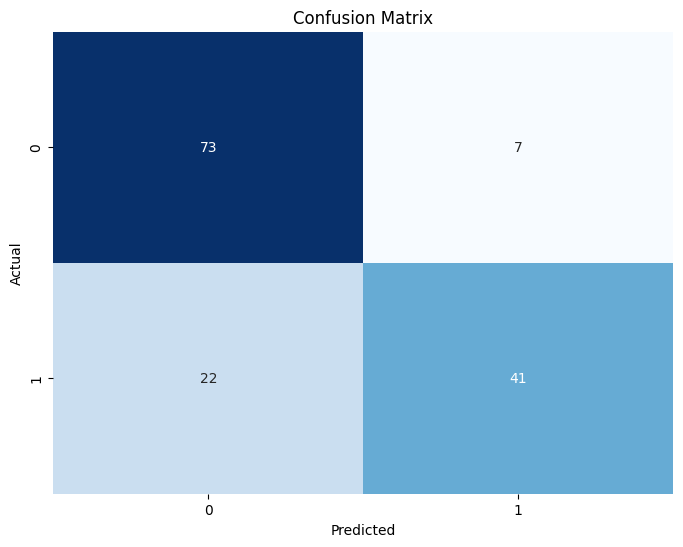

In [8]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Summary:

### Data Analysis Key Findings

*   The dataset was loaded and initially contained 891 entries and 15 columns.
*   After dropping specified columns ('deck', 'embark\_town', 'alive', 'class', 'who', 'adult\_male') and removing rows with missing values, the cleaned DataFrame contained 712 entries with no null values.
*   Categorical variables 'sex' and 'embarked' were successfully encoded into numerical representations.
*   The data was split into training (569 samples) and testing (143 samples) sets, adhering to an approximate 80/20 ratio.
*   A Logistic Regression model was trained on the training data, though a convergence warning was noted.
*   The model achieved an accuracy of 0.7972 on the test set.
*   The classification report provided detailed metrics for precision, recall, and f1-score for both survival classes (0 and 1).
*   The confusion matrix visualized the model's performance, showing the counts of true positives, true negatives, false positives, and false negatives.

### Insights or Next Steps

*   Address the convergence warning by increasing the `max_iter` parameter or scaling the features to potentially improve model performance.
*   Explore other classification models or feature engineering techniques to see if higher accuracy can be achieved.
